In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
df = pd.read_csv('../datasets/StudentsPerformance.csv')

In [74]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [76]:
# Rename columns for convenience
df.columns = ['_'.join(col.split(' ')) for col in df.columns]

In [77]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
# Add total score
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

## Analyzing scores

In [79]:
df_scores = df[['math_score', 'reading_score', 'writing_score', 'total_score']]

In [80]:
df_scores.describe()

,math_score,reading_score,writing_score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


Feature: math_score
Results of KStest normality test: D=0.999, p-value=0.0


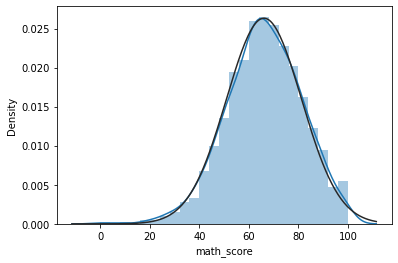

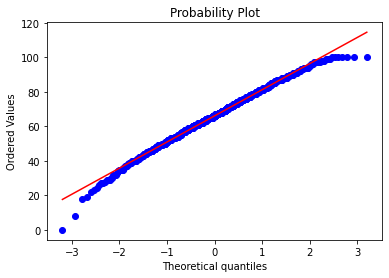


Feature: reading_score
Results of KStest normality test: D=1.000, p-value=0.0


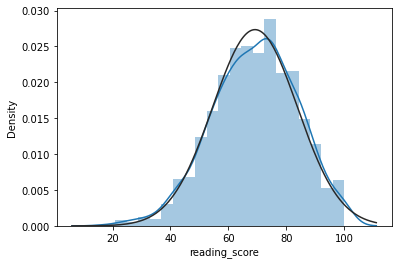

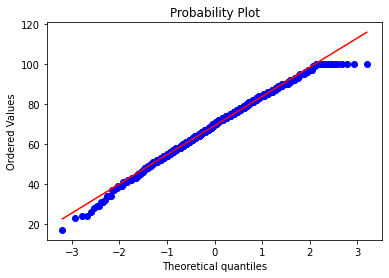


Feature: writing_score
Results of KStest normality test: D=1.000, p-value=0.0


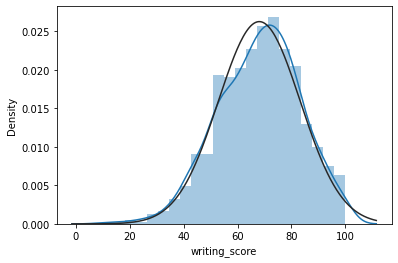

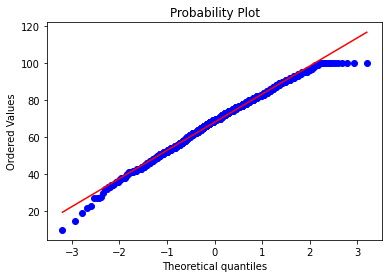


Feature: total_score
Results of KStest normality test: D=1.000, p-value=0.0


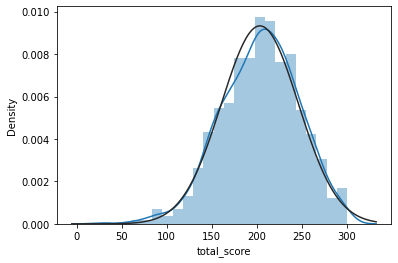

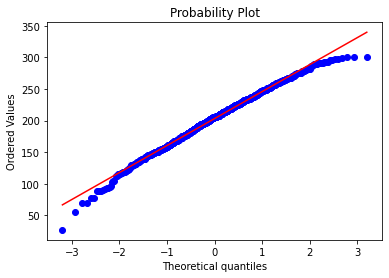

In [106]:
for col in df_scores:
    ks = stats.kstest(df_scores[col], 'norm')
    print('Feature: {}'.format(col))
    print('Results of KStest normality test: D={:.3f}, p-value={}'.format(ks[0], ks[1]))
    sns.distplot(df_scores[col], fit=stats.norm, kde=True)
    fig = plt.figure()
    res = stats.probplot(df_scores[col], plot=plt)
    plt.show()
    print('='*80, '\n')

## Relationship between scores

Relationship between "math_score" and "reading_score"


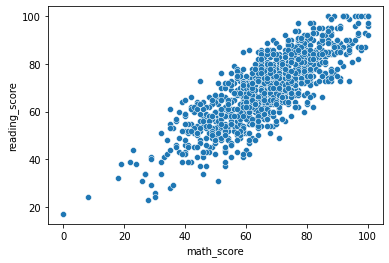


Relationship between "math_score" and "writing_score"


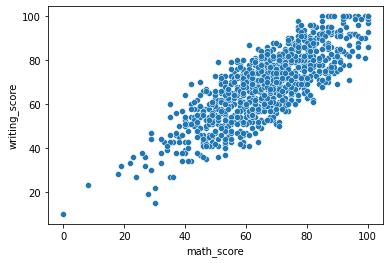

In [108]:
for col in ['reading_score', 'writing_score']:
    print('Relationship between "math_score" and "{}"'.format(col))
    sns.scatterplot(data=df, x='math_score', y=col)
    plt.show()
    print('='*80, '\n')

Relationship between "total_score" and "math_score"


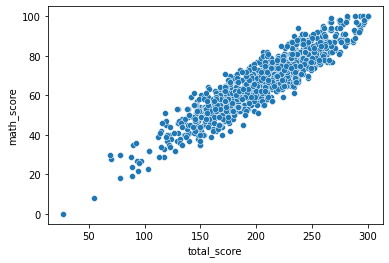


Relationship between "total_score" and "reading_score"


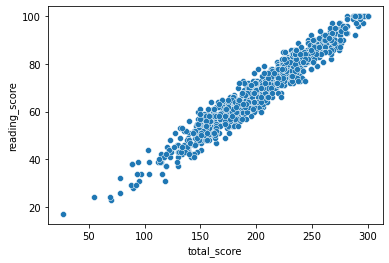


Relationship between "total_score" and "writing_score"


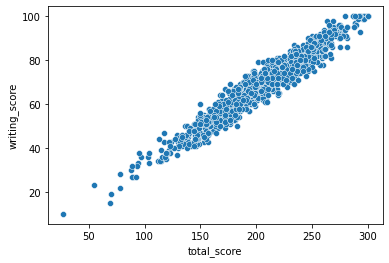

In [107]:
for col in ['math_score', 'reading_score', 'writing_score']:
    print('Relationship between "total_score" and "{}"'.format(col))
    sns.scatterplot(data=df, x='total_score', y=col)
    plt.show()
    print('='*80, '\n')

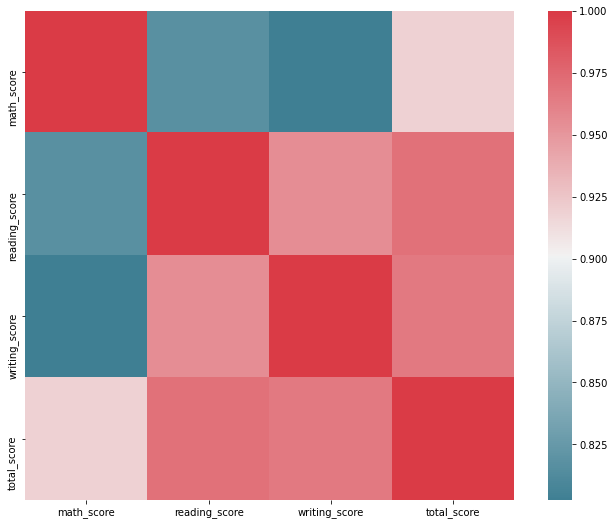

In [103]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corrmat, cmap=cmap, square=True);

## Relationship with categorical features

In [83]:
df.columns

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'total_score'],
      dtype='object')

In [84]:
cat_col = ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
scores = ['math_score', 'reading_score', 'writing_score', 'total_score']

In [92]:
for col in cat_col:
    print('Relationship btw "{}" and "scores"\n'.format(col))
    pv_table = pd.pivot_table(df, index=col, values=scores, aggfunc='median').sort_values('total_score', ascending=False)
    print(pv_table.reindex(scores, axis=1))
    print('='*80, '\n')

Relationship btw "gender" and "scores"

        math_score  reading_score  writing_score  total_score
gender                                                       
female          65             73             74          211
male            69             66             64          199

Relationship btw "race/ethnicity" and "scores"

                math_score  reading_score  writing_score  total_score
race/ethnicity                                                       
group E               74.5             74             72        220.5
group D               69.0             71             72        210.0
group C               65.0             71             68        205.0
group B               63.0             67             67        195.0
group A               61.0             64             62        184.0

Relationship btw "parental_level_of_education" and "scores"

                             math_score  reading_score  writing_score  \
parental_level_of_education           

In [86]:
pd.pivot_table(df, index=['race/ethnicity', 'gender'], values=scores, aggfunc='median').reindex(scores, axis=1)

math_score  reading_score  writing_score  total_score
race/ethnicity gender                                                       
group A        female          57           67.5           67.0        191.0
               male            63           61.0           60.0        183.0
group B        female          62           71.5           71.5        203.0
               male            65           62.0           60.0        188.5
group C        female          63           73.0           74.0        210.0
               male            68           66.0           62.0        194.0
group D        female          65           74.0           76.0        215.0
               male            71           68.0           67.0        206.0
group E        female          71           76.0           76.0        220.0
               male            78           73.0           70.0        221.0

In [87]:
pd.pivot_table(df, index=['parental_level_of_education', 'test_preparation_course'], values=scores, aggfunc='median')\
.sort_values('total_score', ascending=False).reindex(scores, axis=1)

,,math_score,reading_score,writing_score,total_score
parental_level_of_education,test_preparation_course,,,,
associate's degree,completed,71.0,77.0,79.0,229.0
master's degree,completed,71.0,79.0,79.5,229.0
some college,completed,70.0,78.0,77.0,226.0
bachelor's degree,completed,72.5,75.0,79.5,224.5
master's degree,none,73.0,72.0,72.0,219.0
some high school,completed,65.0,71.0,72.0,214.0
bachelor's degree,none,65.5,72.0,70.0,206.5
high school,completed,67.0,68.5,68.0,204.5
associate's degree,none,65.0,68.0,67.0,199.5


In [88]:
t1 = pd.pivot_table(df, index=['parental_level_of_education', 'test_preparation_course'], values='total_score', aggfunc='count')
t1['% of group'] = round((t1.total_score / t1.groupby(level=0).total_score.transform(sum) * 100), 1).astype(str) + '%'
t1

total_score % of group
parental_level_of_education test_preparation_course                        
associate's degree          completed                         82      36.9%
                            none                             140      63.1%
bachelor's degree           completed                         46      39.0%
                            none                              72      61.0%
high school                 completed                         56      28.6%
                            none                             140      71.4%
master's degree             completed                         20      33.9%
                            none                              39      66.1%
some college                completed                         77      34.1%
                            none                             149      65.9%
some high school            completed                         77      43.0%
                            none                             102      57.0%

In [89]:
t2 = pd.pivot_table(df, index=['race/ethnicity', 'lunch'], values='total_score', aggfunc='count')
t2['% of group'] = round((t2.total_score / t2.groupby(level=0).total_score.transform(sum) * 100), 1).astype(str) + '%'
t2

total_score % of group
race/ethnicity lunch                               
group A        free/reduced           36      40.4%
               standard               53      59.6%
group B        free/reduced           69      36.3%
               standard              121      63.7%
group C        free/reduced          114      35.7%
               standard              205      64.3%
group D        free/reduced           95      36.3%
               standard              167      63.7%
group E        free/reduced           41      29.3%
               standard               99      70.7%

Relationship btw "gender" and "total_score"



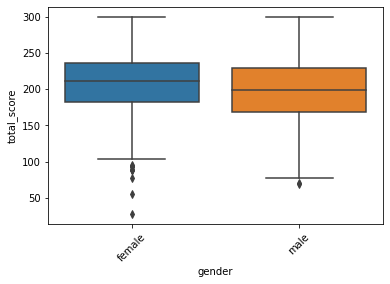


Relationship btw "race/ethnicity" and "total_score"



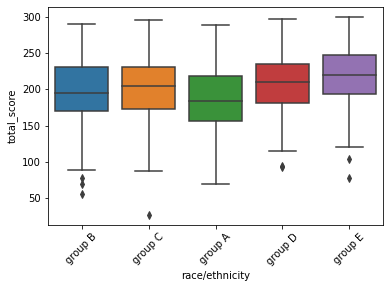


Relationship btw "parental_level_of_education" and "total_score"



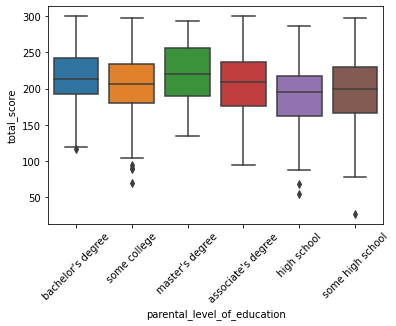


Relationship btw "lunch" and "total_score"



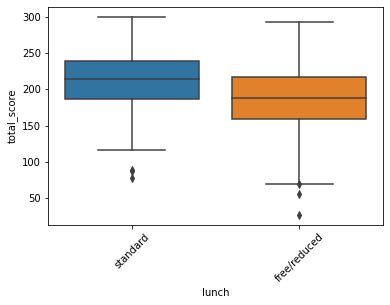


Relationship btw "test_preparation_course" and "total_score"



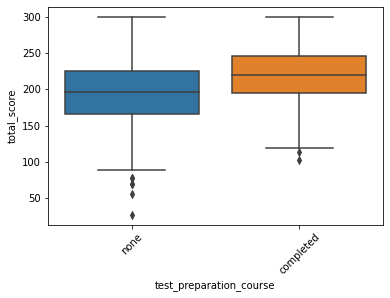

In [99]:
for col in cat_col:
    print('Relationship btw "{}" and "total_score"\n'.format(col))
    sns.boxplot(x=col, y='total_score', data=df)
    plt.xticks(rotation=45)
    plt.show()
    print('='*80, '\n')